In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-accident-survival/accident.csv


In [2]:
#/kaggle/input/road-accident-survival/accident.csv

In [3]:
import pandas as pd

try:
    df = pd.read_csv('/kaggle/input/road-accident-survival/accident.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'accident.csv' not found. Please ensure the file exists in the current directory.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse 'accident.csv'. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [4]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types and identify numerical and categorical columns
print("\nData Types:\n", df.dtypes)

# Generate descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("\nDescriptive Statistics for Numerical Columns:\n", df[numerical_cols].describe())

# Calculate frequency distribution for categorical columns
categorical_cols = df.select_dtypes(exclude=['number']).columns
for col in categorical_cols:
    print(f"\nFrequency Distribution for {col}:\n{df[col].value_counts()}")

# Look for missing values
print("\nMissing Values:\n", df.isnull().sum())

Shape of the DataFrame: (200, 6)

Data Types:
 Age                  int64
Gender              object
Speed_of_Impact    float64
Helmet_Used         object
Seatbelt_Used       object
Survived             int64
dtype: object

Descriptive Statistics for Numerical Columns:
              Age  Speed_of_Impact   Survived
count  200.00000       197.000000  200.00000
mean    43.42500        70.441624    0.50500
std     14.94191        30.125298    0.50123
min     18.00000        20.000000    0.00000
25%     31.00000        43.000000    0.00000
50%     43.50000        71.000000    1.00000
75%     56.00000        95.000000    1.00000
max     69.00000       119.000000    1.00000

Frequency Distribution for Gender:
Gender
Female    110
Male       89
Name: count, dtype: int64

Frequency Distribution for Helmet_Used:
Helmet_Used
Yes    111
No      89
Name: count, dtype: int64

Frequency Distribution for Seatbelt_Used:
Seatbelt_Used
Yes    111
No      89
Name: count, dtype: int64

Missing Values:
 Age

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


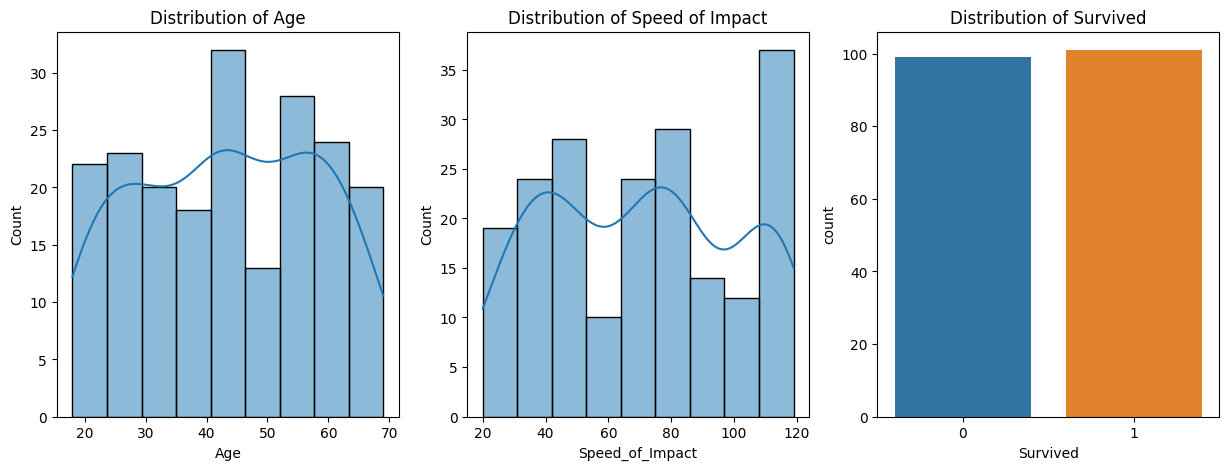

             Age  Speed_of_Impact   Survived
count  200.00000       197.000000  200.00000
mean    43.42500        70.441624    0.50500
std     14.94191        30.125298    0.50123
min     18.00000        20.000000    0.00000
25%     31.00000        43.000000    0.00000
50%     43.50000        71.000000    1.00000
75%     56.00000        95.000000    1.00000
max     69.00000       119.000000    1.00000

Frequency distribution for Gender:
Gender
Female    0.552764
Male      0.447236
Name: proportion, dtype: float64


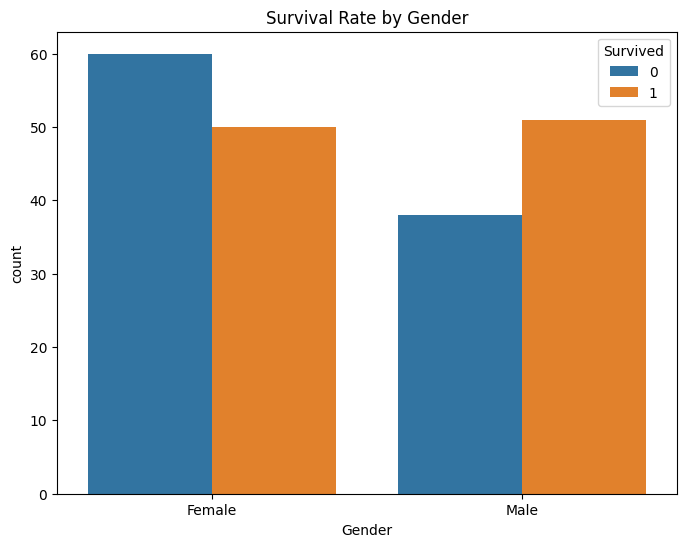


Frequency distribution for Helmet_Used:
Helmet_Used
Yes    0.555
No     0.445
Name: proportion, dtype: float64


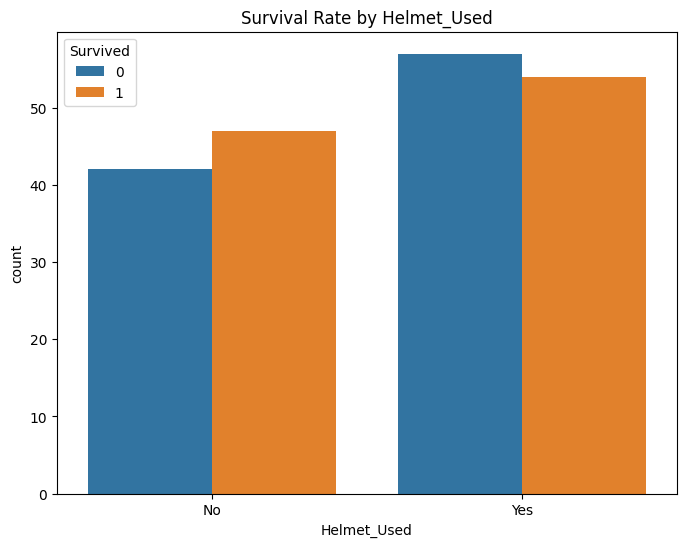


Frequency distribution for Seatbelt_Used:
Seatbelt_Used
Yes    0.555
No     0.445
Name: proportion, dtype: float64


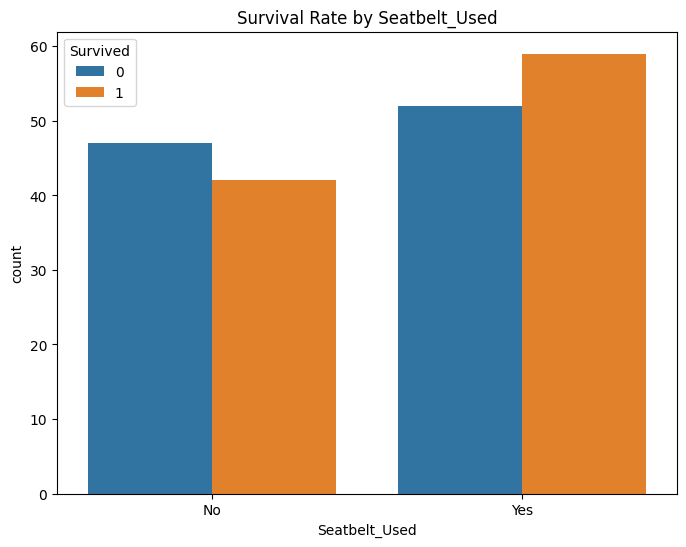


Average speed of impact and survival rate by Gender:


,Speed_of_Impact,Survived
Gender,,
Female,71.724771,0.454545
Male,68.816092,0.573034



Average speed of impact and survival rate by Helmet_Used:


,Speed_of_Impact,Survived
Helmet_Used,,
No,70.806818,0.528090
Yes,70.146789,0.486486



Average speed of impact and survival rate by Seatbelt_Used:


,Speed_of_Impact,Survived
Seatbelt_Used,,
No,70.441860,0.471910
Yes,70.441441,0.531532



Correlation between numerical features:


,Age,Speed_of_Impact,Survived
Age,1.000000,0.106614,0.11009
Speed_of_Impact,0.106614,1.000000,0.04252
Survived,0.110090,0.042520,1.00000


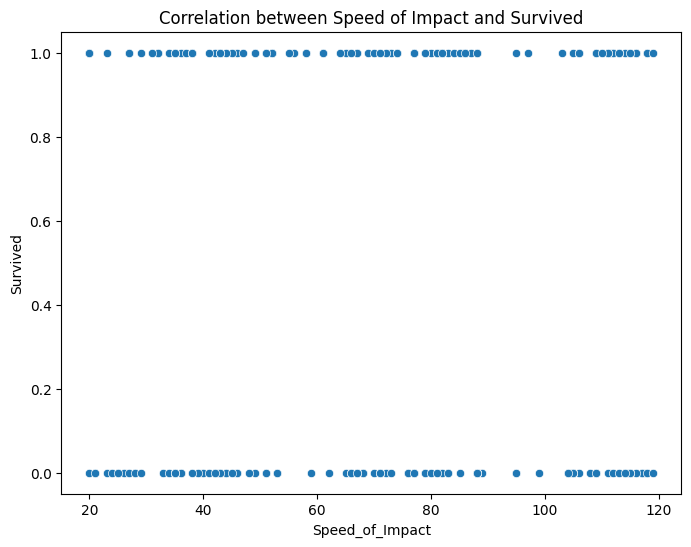

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['Speed_of_Impact'].dropna(), kde=True)
plt.title('Distribution of Speed of Impact')

plt.subplot(1, 3, 3)
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survived')
plt.show()

print(df[['Age', 'Speed_of_Impact', 'Survived']].describe())


# Analyze categorical features
for col in ['Gender', 'Helmet_Used', 'Seatbelt_Used']:
    print(f'\nFrequency distribution for {col}:')
    print(df[col].value_counts(normalize=True))
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Survived', data=df)
    plt.title(f'Survival Rate by {col}')
    plt.show()

# Investigate relationships between numerical and categorical features
for col in ['Gender', 'Helmet_Used', 'Seatbelt_Used']:
    print(f'\nAverage speed of impact and survival rate by {col}:')
    display(df.groupby(col).agg({'Speed_of_Impact': 'mean', 'Survived': 'mean'}))

# Explore potential correlations between numerical features
print('\nCorrelation between numerical features:')
display(df[['Age', 'Speed_of_Impact', 'Survived']].corr())

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Speed_of_Impact', y='Survived', data=df)
plt.title('Correlation between Speed of Impact and Survived')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


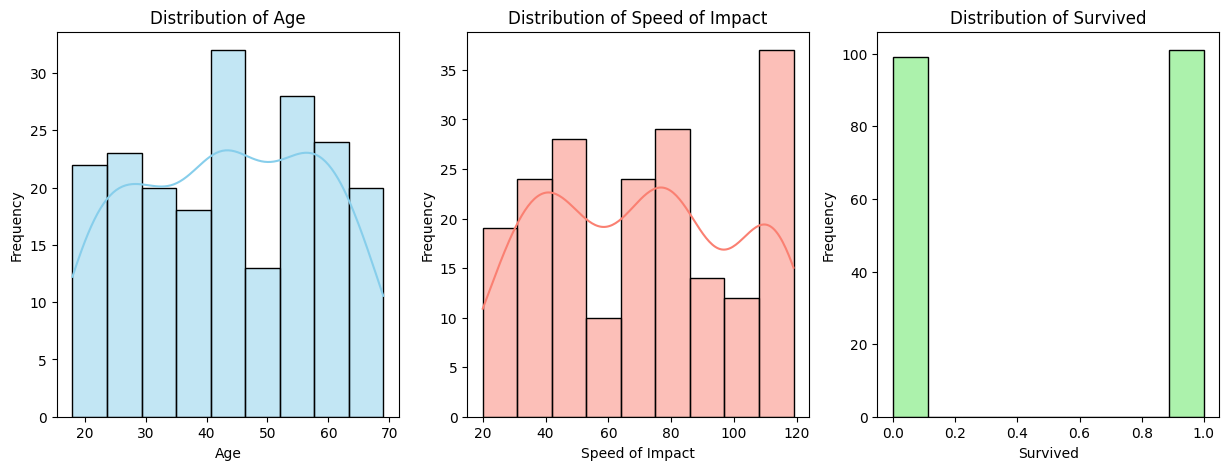

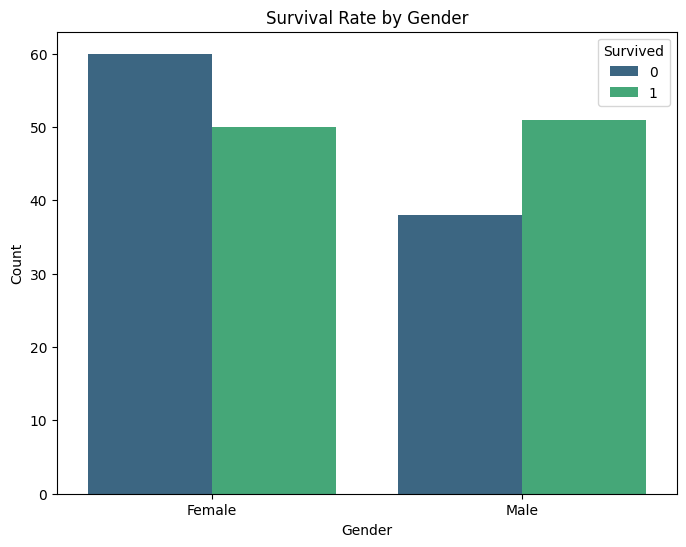

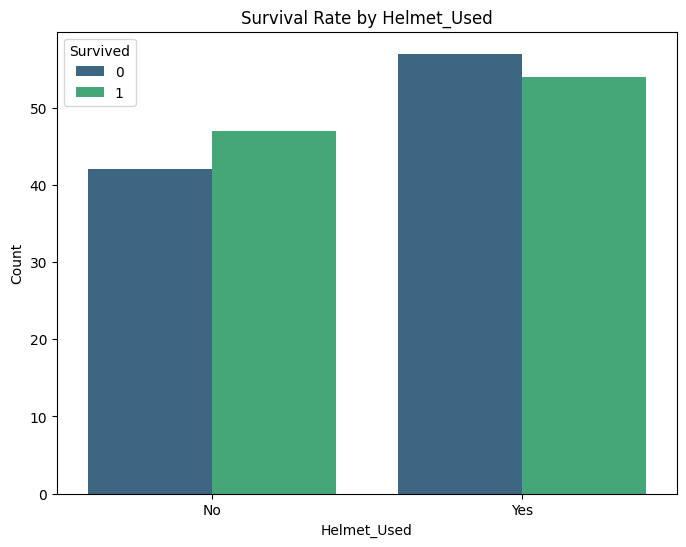

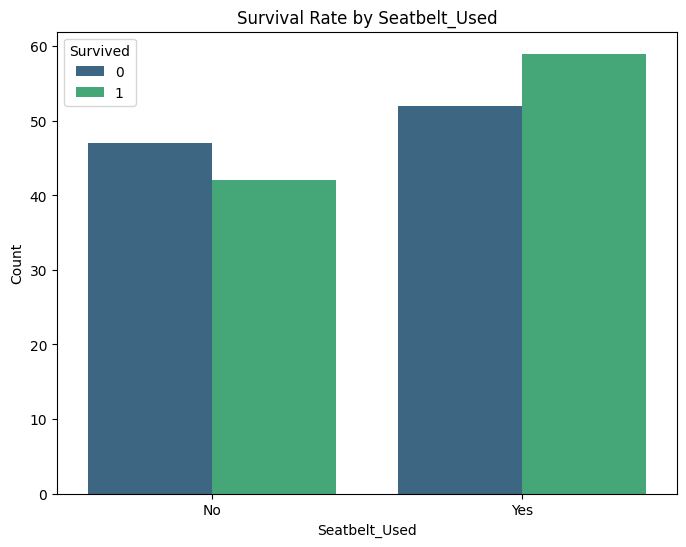

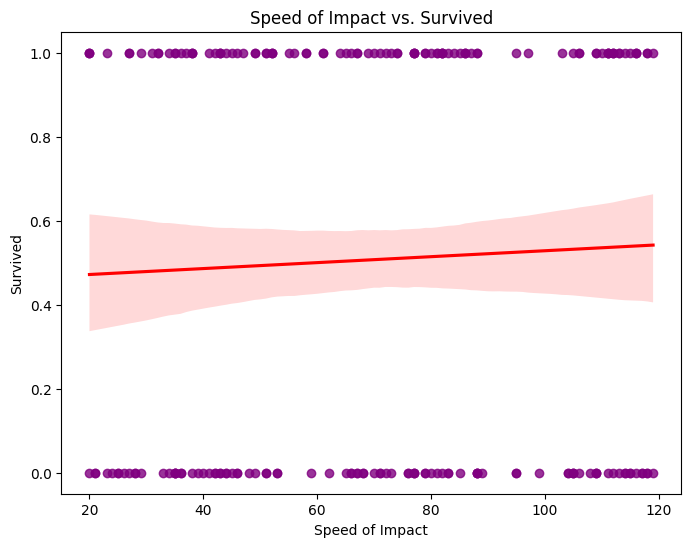

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms with KDE
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['Speed_of_Impact'].dropna(), kde=True, color='salmon')
plt.title('Distribution of Speed of Impact')
plt.xlabel('Speed of Impact')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['Survived'], kde=False, color='lightgreen') # kde not suitable for discrete variable
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()


# Countplots
for col in ['Gender', 'Helmet_Used', 'Seatbelt_Used']:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Survived', data=df, palette='viridis')
    plt.title(f'Survival Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Scatter plot with trendline
plt.figure(figsize=(8, 6))
sns.regplot(x='Speed_of_Impact', y='Survived', data=df, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.title('Speed of Impact vs. Survived')
plt.xlabel('Speed of Impact')
plt.ylabel('Survived')
plt.show()

In [7]:
import numpy as np

# Numerical Feature Analysis
numerical_features = ['Age', 'Speed_of_Impact', 'Survived']
for col in numerical_features:
    print(f"Statistics for {col}:")
    print(f"Skewness: {df[col].skew()}")
    print(f"Kurtosis: {df[col].kurt()}")
    print(f"Outliers (using IQR):")
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(outliers)


# Categorical Feature Analysis
categorical_features = ['Gender', 'Helmet_Used', 'Seatbelt_Used']
for col in categorical_features:
    print(f"\nSurvival Rate by {col}:")
    print(df.groupby(col)['Survived'].mean())

# Relationships between variables
print("\nAverage Speed of Impact by Survival Status:")
print(df.groupby('Survived')['Speed_of_Impact'].mean())

print("\nCorrelation between Age and Survival:")
print(df['Age'].corr(df['Survived']))

# Missing Value Handling
df['Speed_of_Impact'] = df['Speed_of_Impact'].fillna(df['Speed_of_Impact'].mean())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

print(df.isnull().sum())

Statistics for Age:
Skewness: -0.0527456547346652
Kurtosis: -1.1672353043813055
Outliers (using IQR):
Empty DataFrame
Columns: [Age, Gender, Speed_of_Impact, Helmet_Used, Seatbelt_Used, Survived]
Index: []
Statistics for Speed_of_Impact:
Skewness: 0.05161400684204895
Kurtosis: -1.2379729698889317
Outliers (using IQR):
Empty DataFrame
Columns: [Age, Gender, Speed_of_Impact, Helmet_Used, Seatbelt_Used, Survived]
Index: []
Statistics for Survived:
Skewness: -0.020152459510046142
Kurtosis: -2.01989434445675
Outliers (using IQR):
Empty DataFrame
Columns: [Age, Gender, Speed_of_Impact, Helmet_Used, Seatbelt_Used, Survived]
Index: []

Survival Rate by Gender:
Gender
Female    0.454545
Male      0.573034
Name: Survived, dtype: float64

Survival Rate by Helmet_Used:
Helmet_Used
No     0.528090
Yes    0.486486
Name: Survived, dtype: float64

Survival Rate by Seatbelt_Used:
Seatbelt_Used
No     0.471910
Yes    0.531532
Name: Survived, dtype: float64

Average Speed of Impact by Survival Status:
Su

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


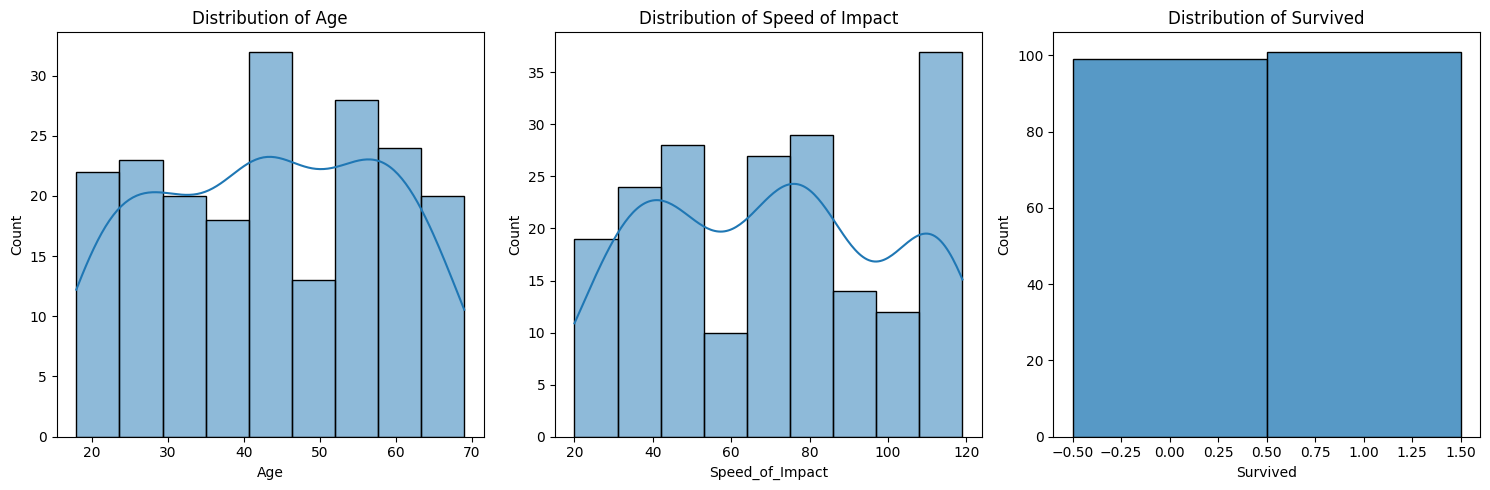

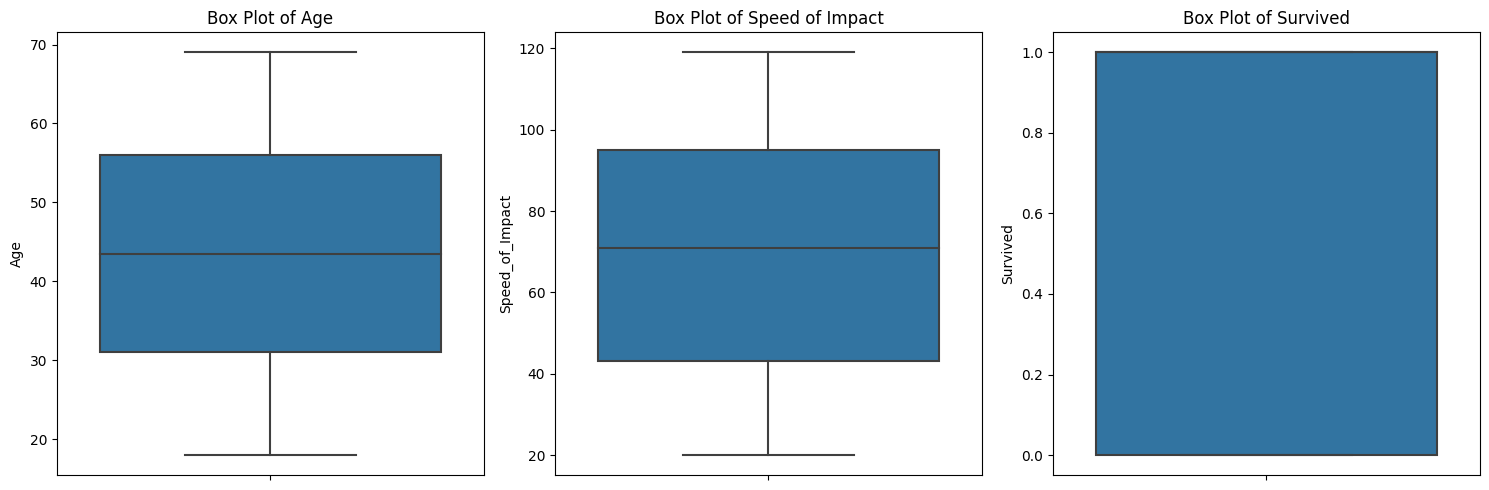

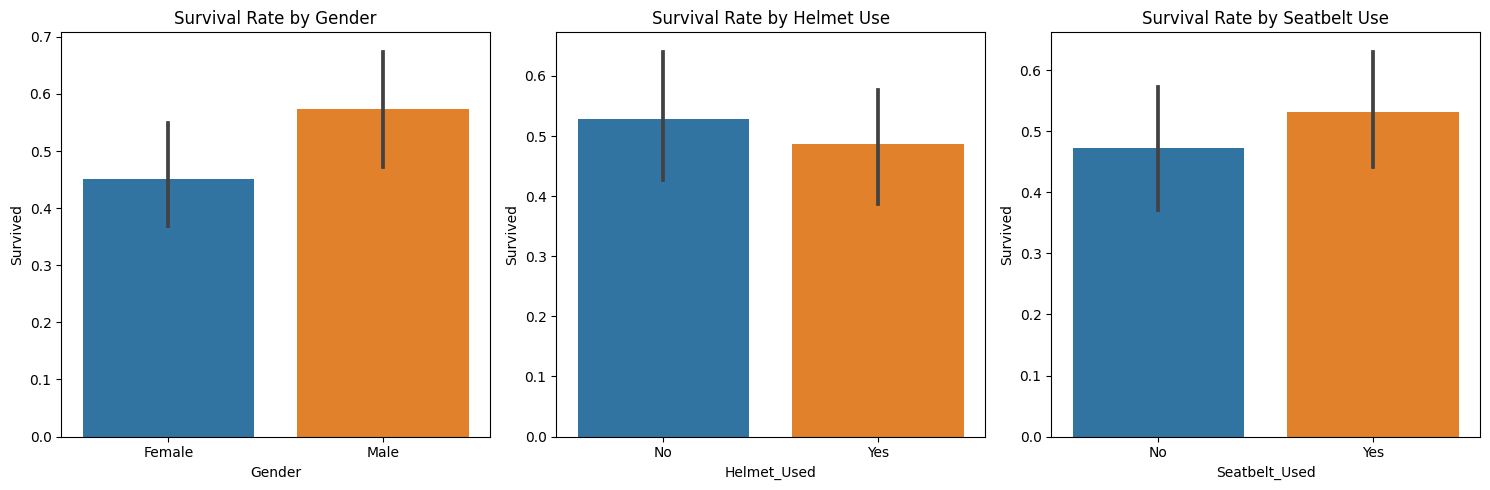

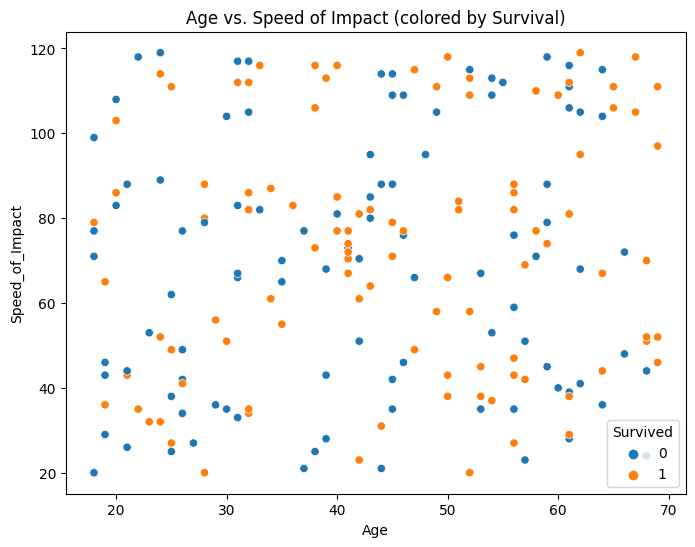

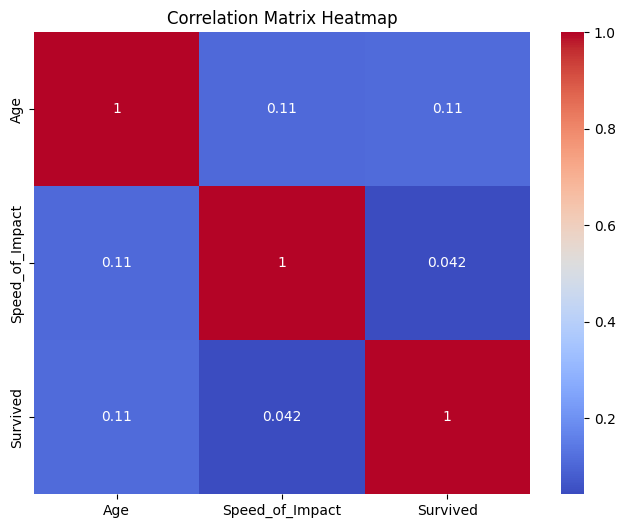

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.subplot(1, 3, 2)
sns.histplot(df['Speed_of_Impact'], kde=True)
plt.title('Distribution of Speed of Impact')
plt.subplot(1, 3, 3)
sns.histplot(df['Survived'], kde=False, discrete=True)
plt.title('Distribution of Survived')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Age'])
plt.title('Box Plot of Age')
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Speed_of_Impact'])
plt.title('Box Plot of Speed of Impact')
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Survived'])
plt.title('Box Plot of Survived')
plt.tight_layout()
plt.show()

# Bar charts for survival rate
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='Gender', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.subplot(1, 3, 2)
sns.barplot(x='Helmet_Used', y='Survived', data=df)
plt.title('Survival Rate by Helmet Use')
plt.subplot(1, 3, 3)
sns.barplot(x='Seatbelt_Used', y='Survived', data=df)
plt.title('Survival Rate by Seatbelt Use')
plt.tight_layout()
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Speed_of_Impact', hue='Survived', data=df)
plt.title('Age vs. Speed of Impact (colored by Survival)')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Speed_of_Impact', 'Survived']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()